# Breast Cancer Prediction Model

## Importing primary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
import plotly.express as px
import pandas_profiling as pp
import warnings
warnings.filterwarnings("ignore")

In [101]:
df = pd.read_csv("data.csv")
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [103]:
round(df.isna().sum() * 100 / len(df) , 2).sort_values(ascending = False)

Unnamed: 32                100.0
compactness_se               0.0
fractal_dimension_worst      0.0
symmetry_worst               0.0
concave points_worst         0.0
concavity_worst              0.0
compactness_worst            0.0
smoothness_worst             0.0
area_worst                   0.0
perimeter_worst              0.0
texture_worst                0.0
radius_worst                 0.0
fractal_dimension_se         0.0
symmetry_se                  0.0
concave points_se            0.0
concavity_se                 0.0
id                           0.0
diagnosis                    0.0
area_se                      0.0
perimeter_se                 0.0
texture_se                   0.0
radius_se                    0.0
fractal_dimension_mean       0.0
symmetry_mean                0.0
concave points_mean          0.0
concavity_mean               0.0
compactness_mean             0.0
smoothness_mean              0.0
area_mean                    0.0
perimeter_mean               0.0
texture_me

In [104]:
df.drop(["Unnamed: 32" , "id"] , axis = 1 , inplace = True)

## Basic Preprocessing and EDA

In [105]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
df["diagnosis"] = lb.fit_transform(df["diagnosis"])

<AxesSubplot:ylabel='None'>

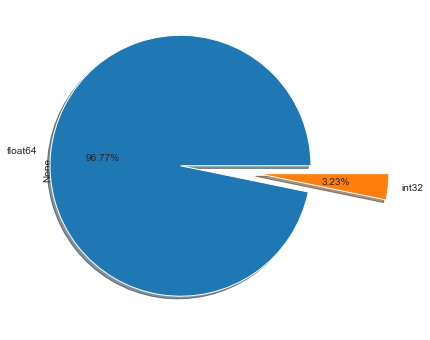

In [90]:
plt.figure(figsize = (15 , 6))
df.dtypes.value_counts().plot.pie(explode=[0.3,0.3] , autopct='%1.2f%%' , shadow=True)

<AxesSubplot:xlabel='diagnosis', ylabel='count'>

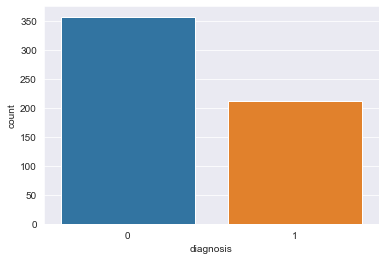

In [91]:
sns.countplot(data = df , x = "diagnosis" )

<AxesSubplot:>

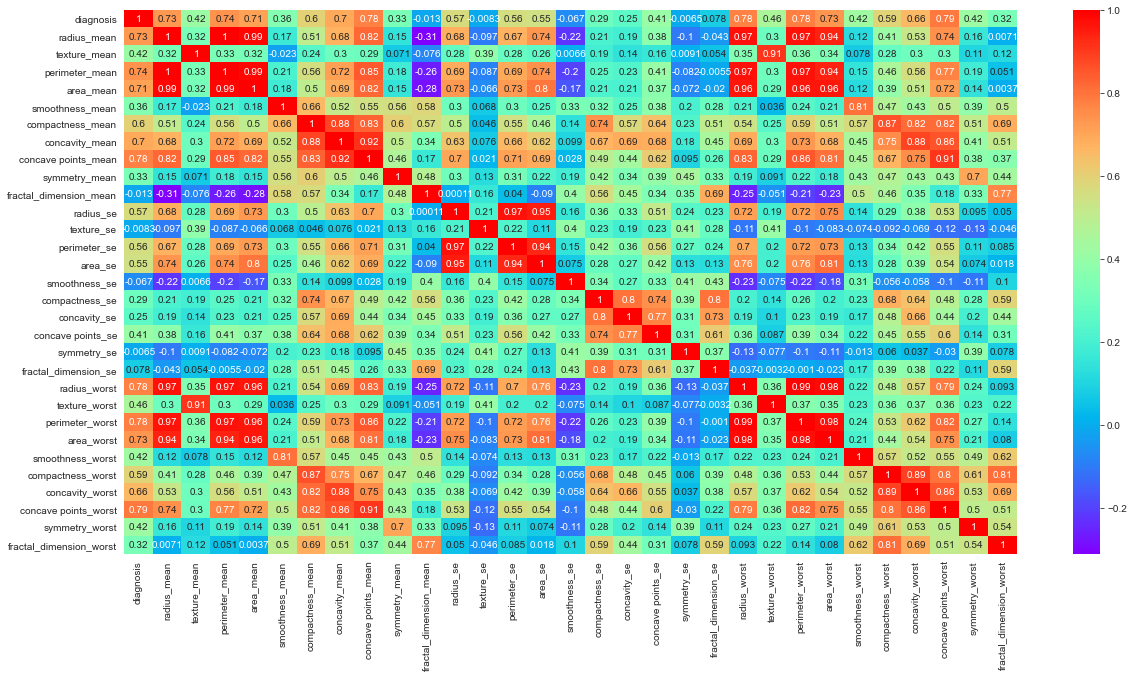

In [16]:
plt.figure(figsize = (20 , 10))
sns.heatmap(df.corr() , annot = True , cmap = "rainbow")

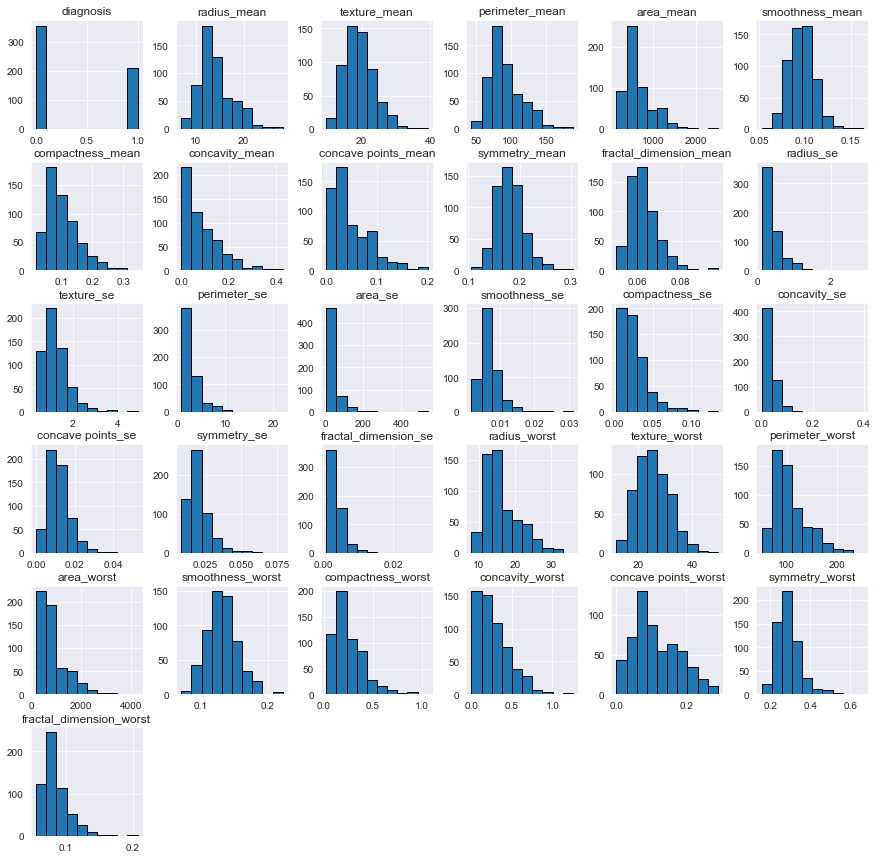

In [49]:
df.hist(edgecolor = "black" , figsize = (15 , 15));

## Outliers Treatment
1. Skewness in the range of [-3 , 3]
2. Kurtosis in the range of [-1 , 10]

radius_se with skewness of   3.0886121663847574


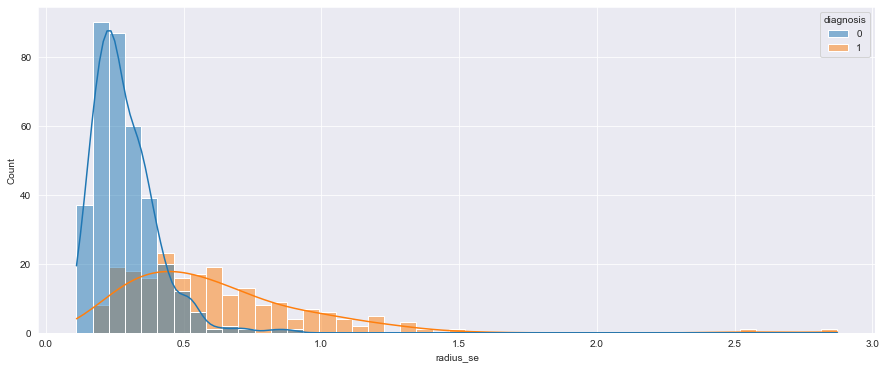

perimeter_se with skewness of    3.443615202194899


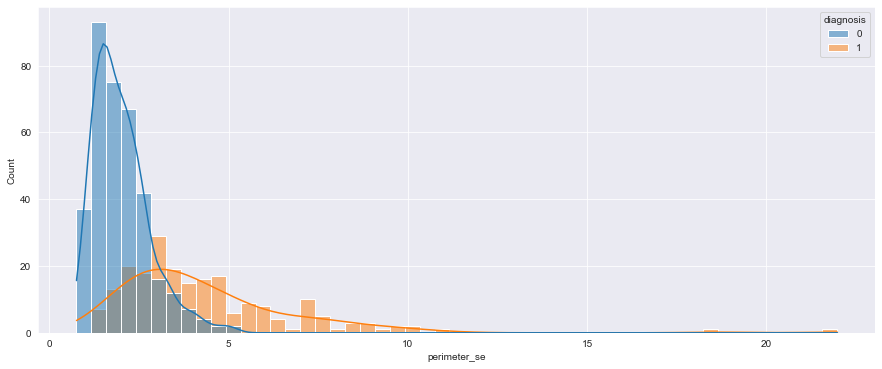

area_se with skewness of    5.447186284898394


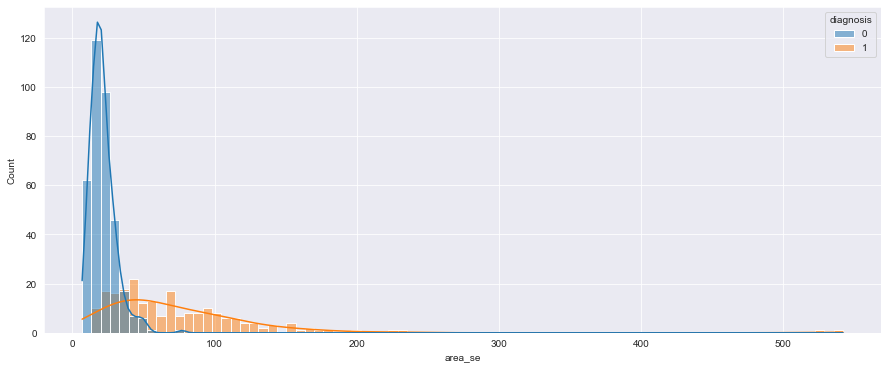

concavity_se with skewness of    5.110463049043661


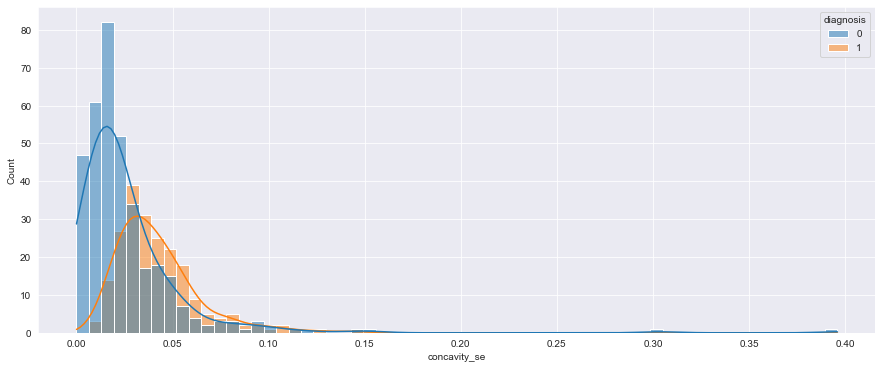

fractal_dimension_se with skewness of    3.923968620227413


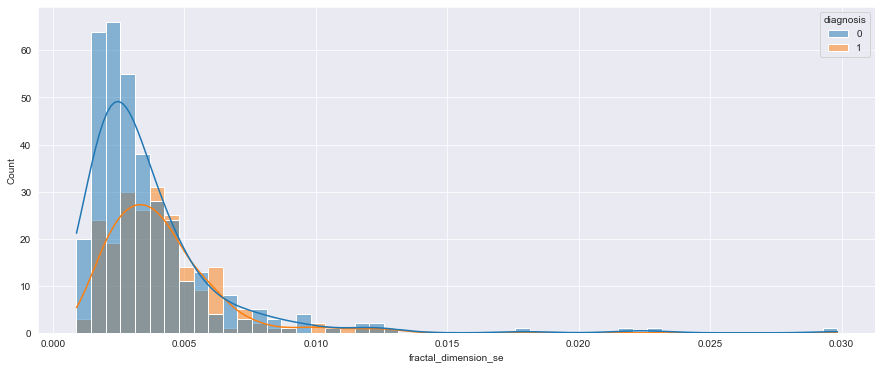

In [106]:
for i in range(len(df.skew())):
    if df.skew()[i] > 3 or df.skew()[i] < -3:
        print(f"{df.skew().index[i]} with skewness of {df.skew()[i] : >{20}}")
        plt.figure(figsize = (15 , 6))
        sns.histplot(data = df , x = df.columns[i] , hue = "diagnosis" , kde = True)
        plt.show()

radius_se with kurtosis of   17.686725966164644


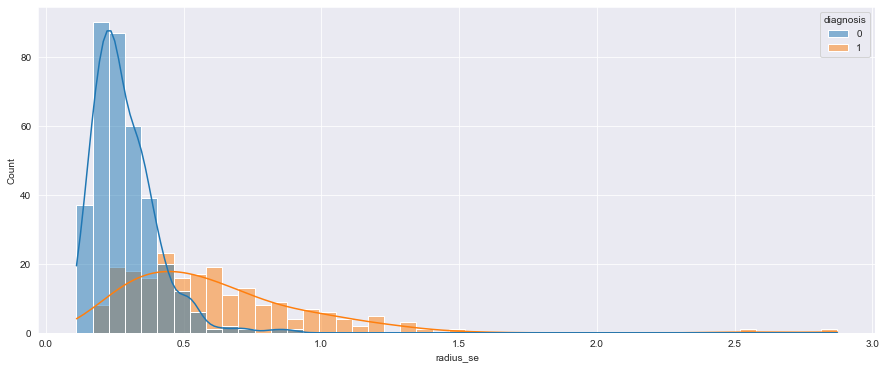

perimeter_se with kurtosis of    21.40190492588045


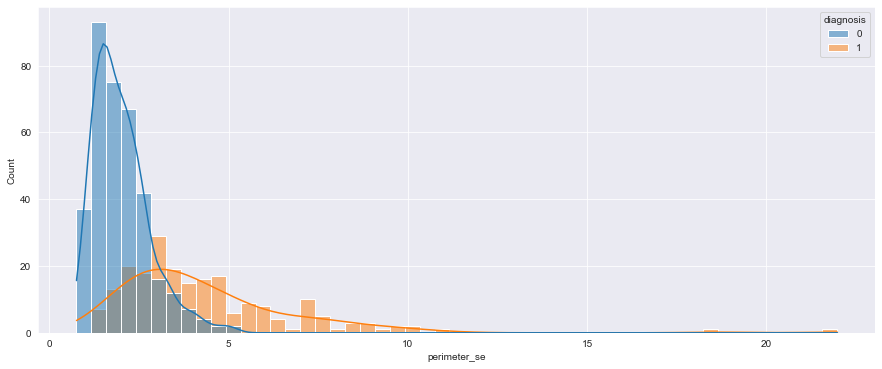

area_se with kurtosis of    49.20907650724119


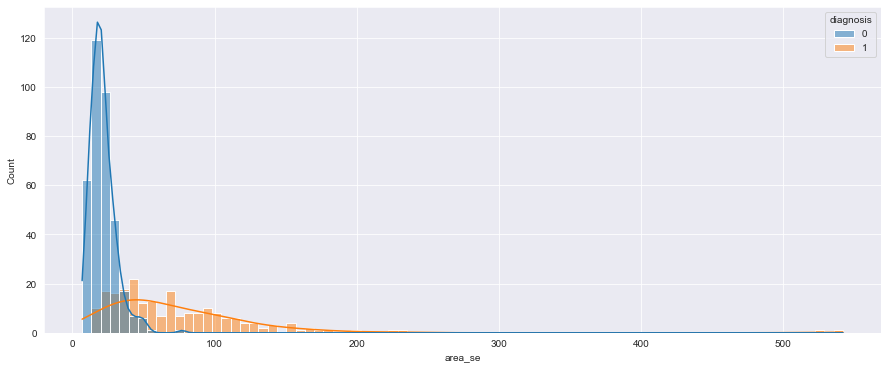

smoothness_se with kurtosis of   10.469839532360393


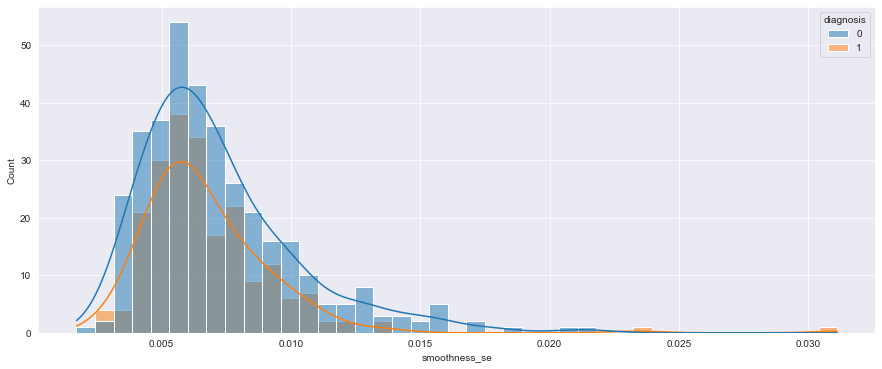

concavity_se with kurtosis of     48.8613953017919


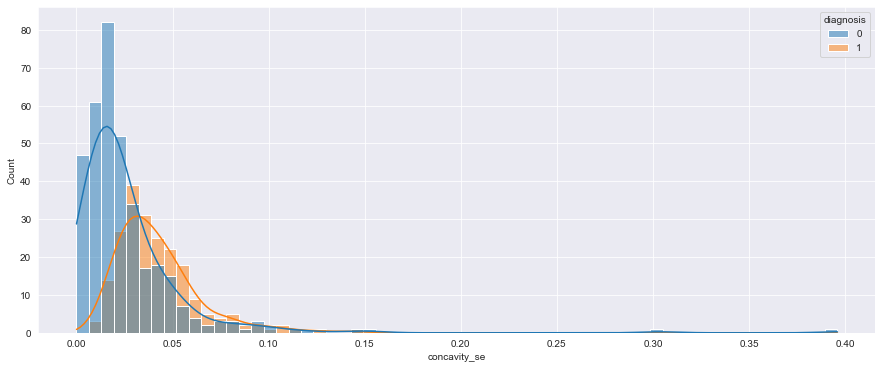

fractal_dimension_se with kurtosis of   26.280847486373336


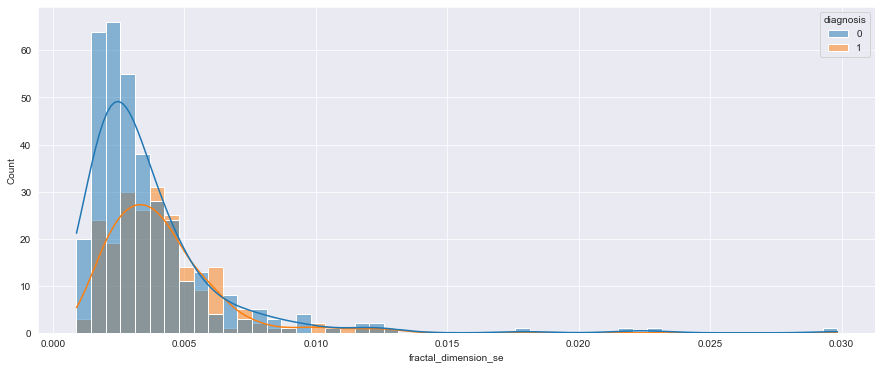

In [107]:
for i in range(len(df.kurtosis())):
    if df.kurtosis()[i] > 10 or df.kurtosis()[i] < -10:
        print(f"{df.kurtosis().index[i]} with kurtosis of {df.kurtosis()[i] : >{20}}")
        plt.figure(figsize = (15 , 6))
        sns.histplot(data = df , x = df.columns[i] , hue = "diagnosis" , kde = True)
        plt.show()

There are outliers in the above columns

In [108]:
df_temp = df.copy()

### Treating Outliers

In [113]:
df["diagnosis"].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [114]:
# Percentile Cutoff method

outs = ["radius_se" , "perimeter_se" , "area_se" , "smoothness_se" , "concavity_se" , "fractal_dimension_se"]

for i in outs:
    df[i].loc[df[i] < np.percentile(df[i] , [1])[0] * 0.3] = np.percentile(df[i] , [1])[0]
    df[i].loc[df[i] > np.percentile(df[i] , [99])[0] * 3] = np.percentile(df[i] , [99])[0]

In [116]:
# Exponential Smothening

for i in outs:
    df[i] = np.log(df[i] + 1)

### Rechecking for outliers after the Treatment

fractal_dimension_se with skewness of   3.8743726424128595


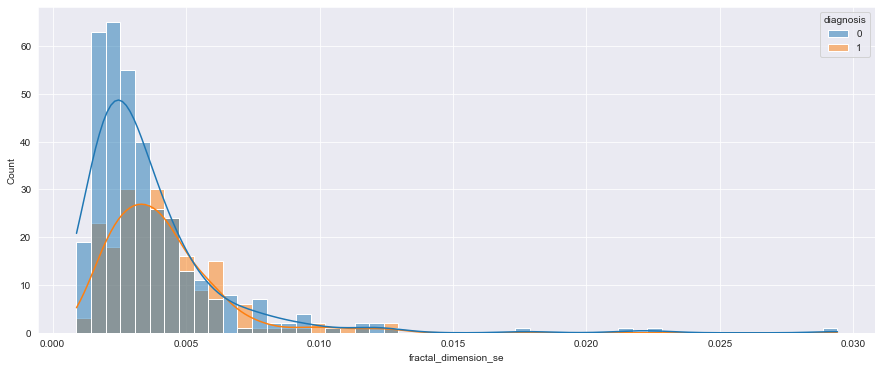

In [117]:
for i in range(len(df.skew())):
    if df.skew()[i] > 3 or df.skew()[i] < -3:
        print(f"{df.skew().index[i]} with skewness of {df.skew()[i] : >{20}}")
        plt.figure(figsize = (15 , 6))
        sns.histplot(data = df , x = df.columns[i] , hue = "diagnosis" , kde = True)
        plt.show()

smoothness_se with kurtosis of   10.182505377335012


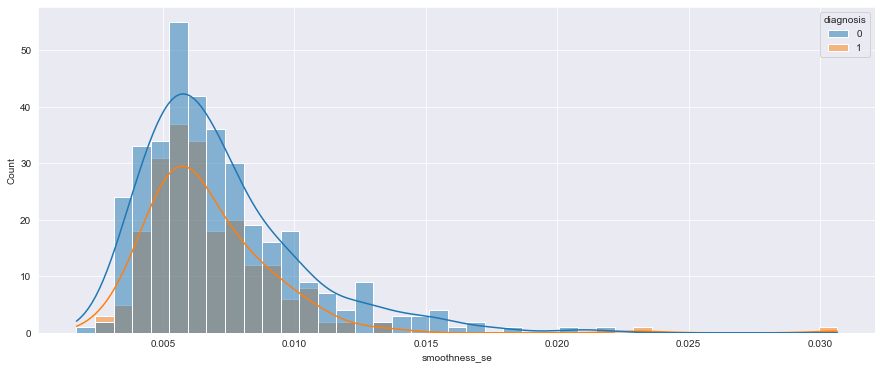

concavity_se with kurtosis of   16.311903958877814


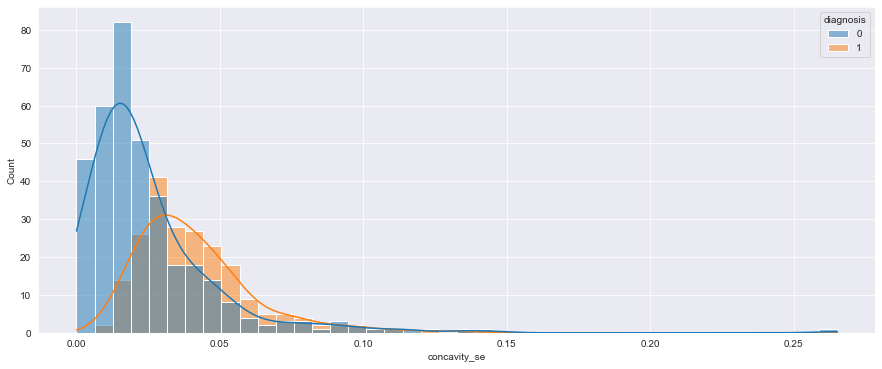

fractal_dimension_se with kurtosis of   25.653550360065246


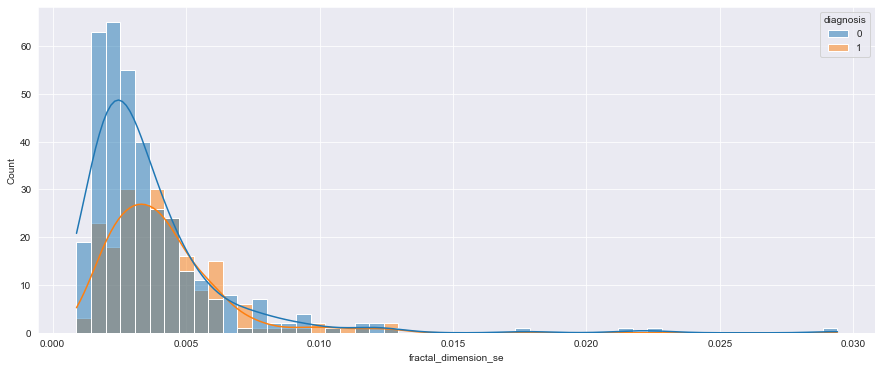

In [118]:
for i in range(len(df.kurtosis())):
    if df.kurtosis()[i] > 10 or df.kurtosis()[i] < -10:
        print(f"{df.kurtosis().index[i]} with kurtosis of {df.kurtosis()[i] : >{20}}")
        plt.figure(figsize = (15 , 6))
        sns.histplot(data = df , x = df.columns[i] , hue = "diagnosis" , kde = True)
        plt.show()

We Removed most of the outliers

### Checking for multicollinearity
Value greater than 5 are to be removed

In [148]:
from sklearn.feature_selection import mutual_info_classif as mif

mif_values = mif(df.drop(["diagnosis"] , axis = 1) , df["diagnosis"])

pd.DataFrame(mif_values , index = df.drop(["diagnosis"] , axis = 1).columns).sort_values(by = 0 , ascending = False)

,0
perimeter_worst,0.472987
area_worst,0.463679
radius_worst,0.452330
concave points_mean,0.440582
concave points_worst,0.435912
perimeter_mean,0.402069
concavity_mean,0.373207
radius_mean,0.368408
area_mean,0.358199
area_se,0.339631


Therefore , no issues of multicollinearity

## Train Test Split

In [119]:
X = df.drop(["diagnosis"] , axis = 1)
y = df["diagnosis"]

In [120]:
y.value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [121]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 42)
len(X_train) , len(X_test) , len(y_train) , len(y_test)

(455, 114, 455, 114)

## Faeture Scaling

In [122]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

ints = X.columns

X_train[ints] = scaler.fit_transform(X_train[ints])
X_test[ints] = scaler.transform(X_test[ints])

## Model Fitting

In [123]:
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix , roc_auc_score , precision_score , recall_score , f1_score , accuracy_score , classification_report , roc_curve , auc , plot_roc_curve
from sklearn.model_selection import cross_val_score

In [128]:
models = []
models.append(("XGBClassifier", XGBClassifier(objective = 'binary:logistic' , random_state = 42 , eval_metric='mlogloss')))
models.append(("CatBoostClassifier", CatBoostClassifier(random_state = 42 , verbose = 0)))
models.append(("RandomForest", RandomForestClassifier(random_state = 42 , n_estimators = 200)))
models.append(("Gradient Boosting Classifier" , GradientBoostingClassifier(random_state = 42)))
models.append(("LightGBM" , LGBMClassifier(random_state = 42 , n_estimators = 200)))
models.append(("Logistic Regression", LogisticRegression(random_state = 42)))
models.append(("KNeigbors", KNeighborsClassifier()))

In [129]:
def metrics(model , X_train , y_train , X_test , y_test , params = False):
    
    mod = model[1].fit(X_train , y_train)
    preds = model[1].predict(X_test)
    accuracies = cross_val_score(estimator = model[1], X = X_train , y = y_train, cv = 10)
    cm = confusion_matrix(y_test , preds)
    cf = classification_report(y_test , preds)
    roc = roc_auc_score(y_test , model[1].predict_proba(X_test)[: , 1])
    fpr, tpr, thresholds = roc_curve(y_test, preds)
    ac = auc(fpr, tpr)
    f1 = f1_score(y_test , preds)
    
    
    print("\n")
    print(model[0])
    
    print("\n")
    if params:
        print(f"Best Parameters are : \n" , model[1].best_params_)
        print("\n")
        
    print(f"Confusion matrix : \n")
    plt.figure(figsize = (8, 5))
    sns.heatmap(cm, cmap = 'coolwarm', annot = True, annot_kws = {'fontsize': 20})
    plt.show()
    print("\n")
    
    print(f"Training score : {model[1].score(X_train , y_train):.4f}")
    print("\n") 
    
    print(f"Test Score : {model[1].score(X_test , y_test):.4f}")
    print("\n")
    
    print(f"K-fold accuracy : {np.mean(accuracies):.4f}")
    print("\n")
    
    print(f"Standard Deviation of Accuracies in k-fold : {np.std(accuracies):.4f}")
    print("\n")
    
    print(f"ROC AUC Score: {roc:.4f}")
    print('\n')
    
    print(f"F1 Score: {f1:.4f}")
    print("\n")
    
    print(f"AUC : {ac:.4f}")
    print("\n")
    
    print(f"Classification report : \n\n{cf}")
    print("\n")

    plt.figure(figsize = (8, 5))
    plot_roc_curve(model[1], X_test, y_test , color = '#FF4500')
    plt.plot([0, 1], [0, 1], linestyle = '--', color = '#7CFC00')
    plt.show()
    print("\n")
    print("*"*100)
    
    print("\n\n")
    
    sam = []
    sam.append(model[0])
    sam.append(model[1].score(X_train , y_train))
    sam.append(model[1].score(X_test , y_test))
    sam.append(np.mean(accuracies))
    sam.append(np.std(accuracies))
    sam.append(roc)
    sam.append(f1)
    sam.append(ac)
    
    return sam , mod



XGBClassifier


Confusion matrix : 



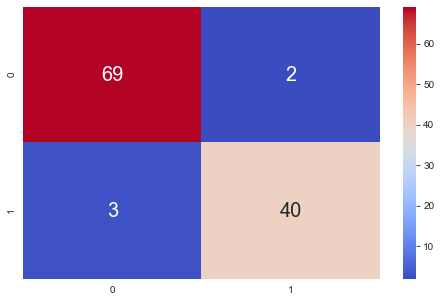



Training score : 1.0000


Test Score : 0.9561


K-fold accuracy : 0.9648


Standard Deviation of Accuracies in k-fold : 0.0223


ROC AUC Score: 0.9912


F1 Score: 0.9412


AUC : 0.9510


Classification report : 

              precision    recall  f1-score   support

           0       0.96      0.97      0.97        71
           1       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114





<Figure size 576x360 with 0 Axes>

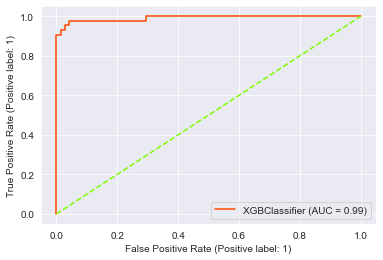



****************************************************************************************************





CatBoostClassifier


Confusion matrix : 



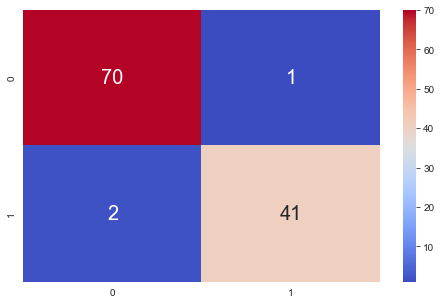



Training score : 1.0000


Test Score : 0.9737


K-fold accuracy : 0.9714


Standard Deviation of Accuracies in k-fold : 0.0262


ROC AUC Score: 0.9964


F1 Score: 0.9647


AUC : 0.9697


Classification report : 

              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114





<Figure size 576x360 with 0 Axes>

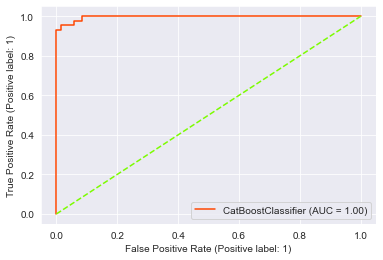



****************************************************************************************************





RandomForest


Confusion matrix : 



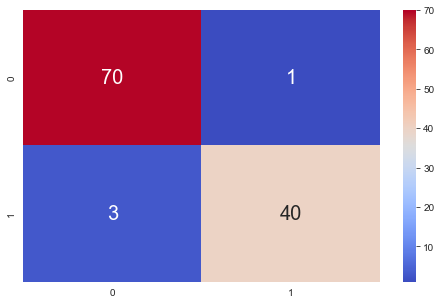



Training score : 1.0000


Test Score : 0.9649


K-fold accuracy : 0.9671


Standard Deviation of Accuracies in k-fold : 0.0223


ROC AUC Score: 0.9959


F1 Score: 0.9524


AUC : 0.9581


Classification report : 

              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114





<Figure size 576x360 with 0 Axes>

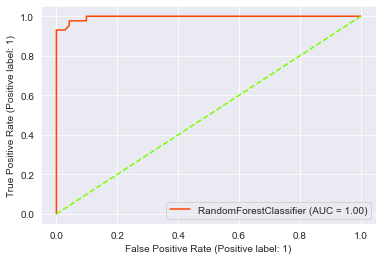



****************************************************************************************************





Gradient Boosting Classifier


Confusion matrix : 



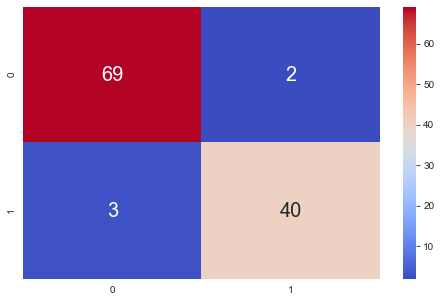



Training score : 1.0000


Test Score : 0.9561


K-fold accuracy : 0.9604


Standard Deviation of Accuracies in k-fold : 0.0293


ROC AUC Score: 0.9954


F1 Score: 0.9412


AUC : 0.9510


Classification report : 

              precision    recall  f1-score   support

           0       0.96      0.97      0.97        71
           1       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114





<Figure size 576x360 with 0 Axes>

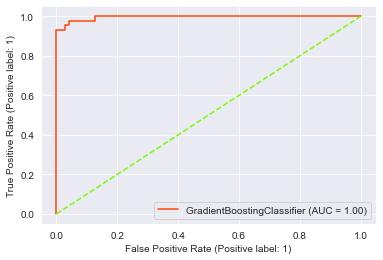



****************************************************************************************************





LightGBM


Confusion matrix : 



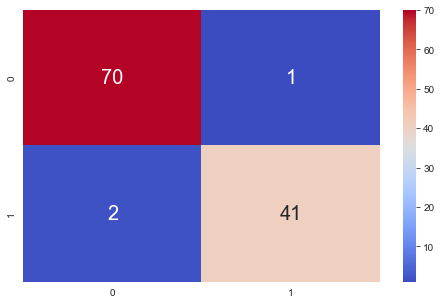



Training score : 1.0000


Test Score : 0.9737


K-fold accuracy : 0.9692


Standard Deviation of Accuracies in k-fold : 0.0265


ROC AUC Score: 0.9918


F1 Score: 0.9647


AUC : 0.9697


Classification report : 

              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114





<Figure size 576x360 with 0 Axes>

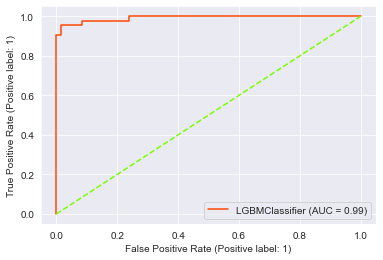



****************************************************************************************************





Logistic Regression


Confusion matrix : 



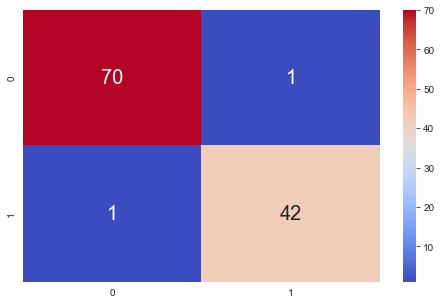



Training score : 0.9868


Test Score : 0.9825


K-fold accuracy : 0.9758


Standard Deviation of Accuracies in k-fold : 0.0155


ROC AUC Score: 0.9974


F1 Score: 0.9767


AUC : 0.9813


Classification report : 

              precision    recall  f1-score   support

           0       0.99      0.99      0.99        71
           1       0.98      0.98      0.98        43

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114





<Figure size 576x360 with 0 Axes>

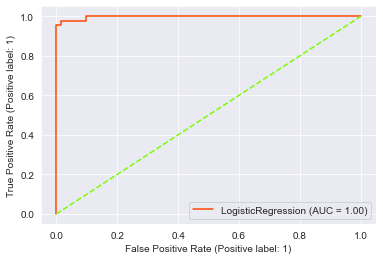



****************************************************************************************************





KNeigbors


Confusion matrix : 



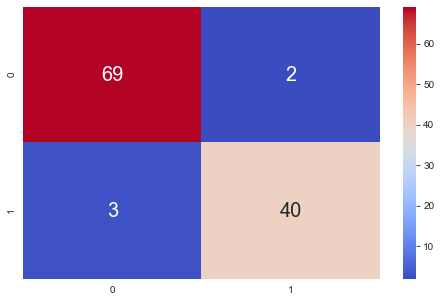



Training score : 0.9802


Test Score : 0.9561


K-fold accuracy : 0.9691


Standard Deviation of Accuracies in k-fold : 0.0317


ROC AUC Score: 0.9835


F1 Score: 0.9412


AUC : 0.9510


Classification report : 

              precision    recall  f1-score   support

           0       0.96      0.97      0.97        71
           1       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114





<Figure size 576x360 with 0 Axes>

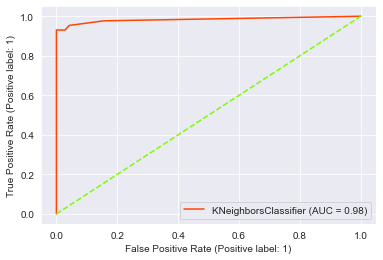



****************************************************************************************************



Wall time: 1min 42s


In [130]:
%%time

pre_final = []

for i in models:
    sam = metrics(i , X_train , y_train , X_test , y_test)
    pre_final.append(sam)

In [131]:
data_pre_final = [x[0] for x in pre_final]

## Model Evaluation and Visualization

In [132]:
me = pd.DataFrame(data_pre_final , columns = ["Model" , "Train Score" , "Test Score" , "K-fold Accuracy" , "K-fold Std" , "ROC_AUC_Score" , "F1 Score" , "AUC"])

me.sort_values(by = [ "F1 Score" , "AUC" , "ROC_AUC_Score" , "K-fold Std" , "K-fold Accuracy" , "Test Score" , "Train Score"] , inplace = True , ascending = [False , False , False , True , False , False , False])
me = me.reset_index(drop = True)
me

,Model,Train Score,Test Score,K-fold Accuracy,K-fold Std,ROC_AUC_Score,F1 Score,AUC
0,Logistic Regression,0.986813,0.982456,0.975797,0.015455,0.997380,0.976744,0.981330
1,CatBoostClassifier,1.000000,0.973684,0.971353,0.026207,0.996397,0.964706,0.969702
2,LightGBM,1.000000,0.973684,0.969227,0.026461,0.991811,0.964706,0.969702
3,RandomForest,1.000000,0.964912,0.967053,0.022303,0.995906,0.952381,0.958074
4,Gradient Boosting Classifier,1.000000,0.956140,0.960435,0.029311,0.995414,0.941176,0.951032
5,XGBClassifier,1.000000,0.956140,0.964831,0.022326,0.991156,0.941176,0.951032
6,KNeigbors,0.980220,0.956140,0.969130,0.031674,0.983459,0.941176,0.951032


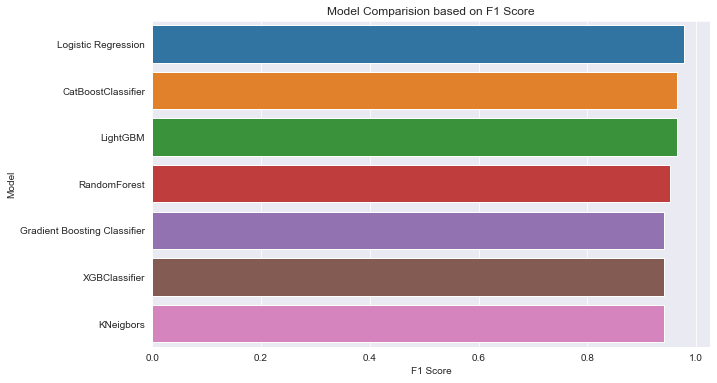

In [174]:
plt.figure(figsize = (10 , 6))
sns.barplot(y = "Model" , x = "F1 Score" , data = me)
plt.title("Model Comparision based on F1 Score");

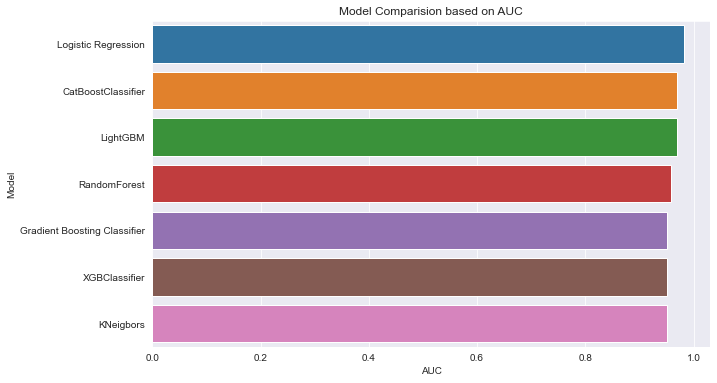

In [175]:
plt.figure(figsize = (10 , 6))
sns.barplot(y = "Model" , x = "AUC" , data = me)
plt.title("Model Comparision based on AUC");

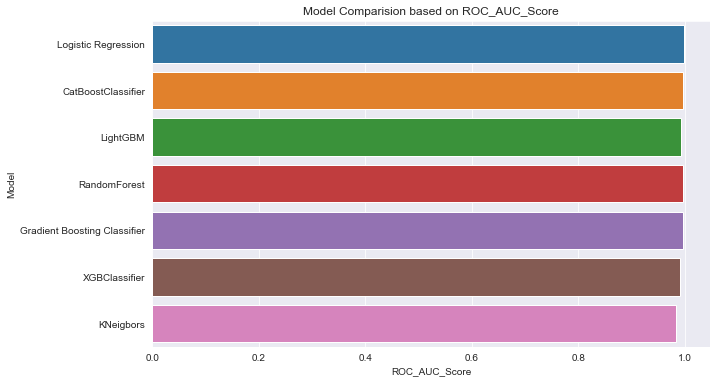

In [176]:
plt.figure(figsize = (10 , 6))
sns.barplot(y = "Model" , x = "ROC_AUC_Score" , data = me)
plt.title("Model Comparision based on ROC_AUC_Score");

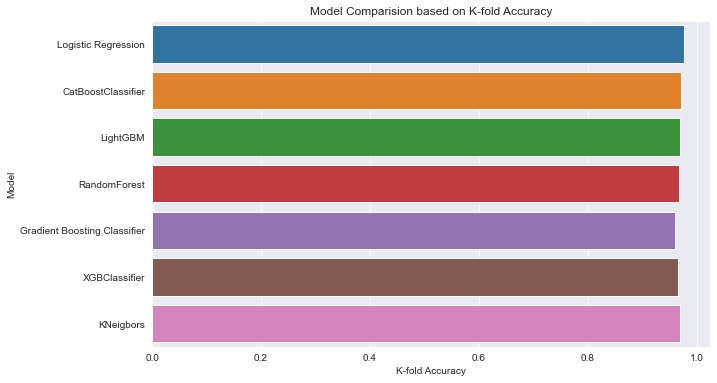

In [177]:
plt.figure(figsize = (10 , 6))
sns.barplot(y = "Model" , x = "K-fold Accuracy" , data = me)
plt.title("Model Comparision based on K-fold Accuracy");

## Model Evaluation with Voting Classifier

In [153]:
from sklearn.ensemble import VotingClassifier

voting_models = models

In [154]:
voting_soft = VotingClassifier(estimators = voting_models , voting = "soft")

In [155]:
voting_hard = VotingClassifier(estimators = voting_models , voting = "hard")

In [156]:
voting_soft.fit(X_train , y_train)

VotingClassifier(estimators=[('XGBClassifier',
                              XGBClassifier(base_score=0.5, booster='gbtree',
                                            colsample_bylevel=1,
                                            colsample_bynode=1,
                                            colsample_bytree=1,
                                            eval_metric='mlogloss', gamma=0,
                                            gpu_id=-1, importance_type='gain',
                                            interaction_constraints='',
                                            learning_rate=0.300000012,
                                            max_delta_step=0, max_depth=6,
                                            min_child_weight=1, missing=nan,
                                            monotone_constraints='(...
                              <catboost.core.CatBoostClassifier object at 0x000002659B44A070>),
                             ('RandomForest',
                  

In [157]:
voting_hard.fit(X_train , y_train)

VotingClassifier(estimators=[('XGBClassifier',
                              XGBClassifier(base_score=0.5, booster='gbtree',
                                            colsample_bylevel=1,
                                            colsample_bynode=1,
                                            colsample_bytree=1,
                                            eval_metric='mlogloss', gamma=0,
                                            gpu_id=-1, importance_type='gain',
                                            interaction_constraints='',
                                            learning_rate=0.300000012,
                                            max_delta_step=0, max_depth=6,
                                            min_child_weight=1, missing=nan,
                                            monotone_constraints='(...
                              <catboost.core.CatBoostClassifier object at 0x000002659B44A070>),
                             ('RandomForest',
                  

In [158]:
def metrics_others(model , X_train , y_train , X_test , y_test , params = False):
    
    preds = model.predict(X_test)
    cm = confusion_matrix(y_test , preds)
    cf = classification_report(y_test , preds)
    roc = roc_auc_score(y_test , model.predict_proba(X_test)[: , 1])
    fpr, tpr, thresholds = roc_curve(y_test, preds)
    ac = auc(fpr, tpr)
    f1 = f1_score(y_test , preds)
    
    print(f"Confusion matrix : \n")
    plt.figure(figsize = (8, 5))
    sns.heatmap(cm, cmap = 'coolwarm', annot = True, annot_kws = {'fontsize': 20})
    plt.show()
    print("\n")
    
    print(f"Training score : {model.score(X_train , y_train):.4f}")
    print("\n") 
    
    print(f"Test Score : {model.score(X_test , y_test):.4f}")
    print("\n")
    
    print(f"ROC AUC Score: {roc:.4f}")
    print('\n')
    
    print(f"F1 Score: {f1:.4f}")
    print("\n")
    
    print(f"AUC : {ac:.4f}")
    print("\n")
    
    print(f"Classification report : \n\n{cf}")
    print("\n")

    plt.figure(figsize = (8, 5))
    plot_roc_curve(model, X_test, y_test , color = '#FF4500')
    plt.plot([0, 1], [0, 1], linestyle = '--', color = '#7CFC00')
    plt.show()
    print("\n")
    print("*"*100)
    
    print("\n\n")
    
    sam = []
    sam.append(model.score(X_train , y_train))
    sam.append(model.score(X_test , y_test))
    sam.append(roc)
    sam.append(f1)
    sam.append(ac)
    
    return sam

Confusion matrix : 



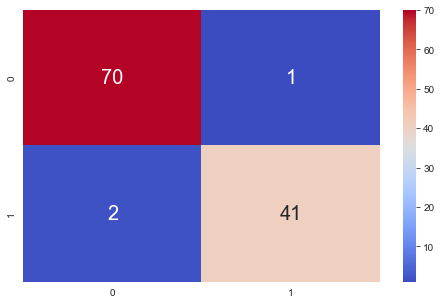



Training score : 1.0000


Test Score : 0.9737


ROC AUC Score: 0.9964


F1 Score: 0.9647


AUC : 0.9697


Classification report : 

              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114





<Figure size 576x360 with 0 Axes>

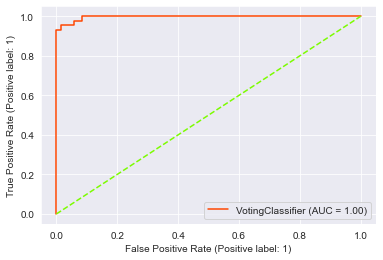



****************************************************************************************************





In [159]:
soft = metrics_others(voting_soft , X_train , y_train , X_test , y_test)

In [160]:
hard_preds = voting_hard.predict(X_test)

In [161]:
f1_score(y_test , hard_preds)

0.9647058823529412

## Model Evaluation with Catboost

In [162]:
from catboost import CatBoostClassifier
cat = CatBoostClassifier(loss_function = "MultiClass", 
                         eval_metric = "TotalF1",
                         random_seed = 42 , 
                         classes_count = 2 ,
                         depth = 10 ,
                         iterations = 3500 , 
                         learning_rate = 0.1 ,
                         leaf_estimation_iterations = 1 ,
                         l2_leaf_reg = 1 ,
                         bootstrap_type = "Bayesian" , 
                         bagging_temperature = 1 , 
                         random_strength = 1 ,
                         od_type = "Iter", 
                         border_count = 100 ,
                         od_wait = 500)

In [164]:
%%time

cat.fit(X_train , y_train , use_best_model = True , eval_set=[(X_test , y_test)] , plot = True , verbose = 0)

Custom logger is already specified. Specify more than one logger at same time is not thread safe.

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Wall time: 36.5 s


In [165]:
cat_preds = cat.predict(X_test)

In [166]:
f1 = f1_score(y_test , cat_preds)
f1

0.9647058823529412

Confusion matrix : 



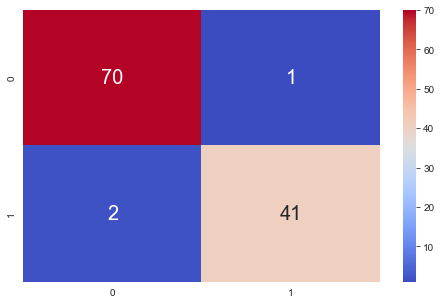



Training score : 0.9934


Test Score : 0.9737


ROC AUC Score: 0.9974


F1 Score: 0.9647


AUC : 0.9697


Classification report : 

              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114





<Figure size 576x360 with 0 Axes>

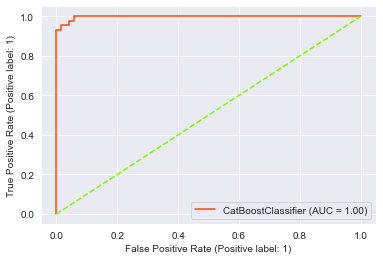



****************************************************************************************************





In [168]:
final_cat = metrics_others(cat , X_train , y_train , X_test , y_test)

## Final model is Logistic Regression

In [170]:
linear_final = pre_final[5][1]

In [173]:
f1_score(y_test , linear_final.predict(X_test))

0.9767441860465116